# Zillow Wrangle Exercises 

In [1]:
# standard imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# custom imports
from env import host, user, password

## Acquire and Summarize

### 1.

Acquire data from mySQL using the python module to connect and query. 
- You will want to end with a single dataframe. 
- Make sure to include: the logerror, all fields related to the properties that are available. 
- You will end up using all the tables in the database.
- Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for airconditioningtypeid.
- Only include properties with a transaction in 2017, and include only the last transaction for each property (so no duplicate property ID's), along with zestimate error and date of transaction.
- Only include properties that include a latitude and longitude value.

### 2.

Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)

### 3.

Write a function that takes in a dataframe of observations and attributes and returns a dataframe where:
- each row is an atttribute name
- the first column is the number of rows with missing values for that attribute
- the second column is percent of total rows that have missing values for that attribute.

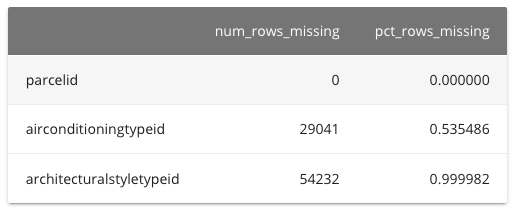

Run the function and document takeaways from this on how you want to handle missing values.

### 4.

Write a function that takes in a dataframe and returns a dataframe with 3 columns: 
- the number of columns missing 
- percent of columns missing
- number of rows with n columns missing. 

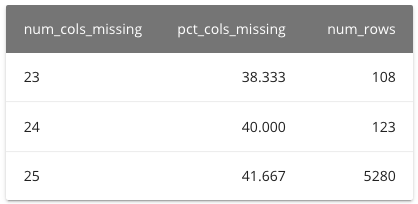

Run the function and document takeaways from this on how you want to handle missing values.

## Prepare

### 1.

Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). 
   - There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer. 
   - But for this exercise, do not purely filter by unitcnt as we did previously. 
   - Add some new logic that will reduce the number of properties that are falsely removed. You might want to use # bedrooms, square feet, unit type or the like to then identify those with unitcnt not defined.

### 2.

Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).
- The input:
    - A dataframe
    - A number between 0 and 1 that represents the proportion, for each column, of rows with non-missing values required to keep the column. i.e. if prop_required_column = .6, then you are requiring a column to have at least 60% of values not-NA (no more than 40% missing).
    - A number between 0 and 1 that represents the proportion, for each row, of columns/variables with non-missing values required to keep the row. For example, if prop_required_row = .75, then you are requiring a row to have at least 75% of variables with a non-missing value (no more that 25% missing).
- The output:
    - The dataframe with the columns and rows dropped as indicated. Be sure to drop the columns prior to the rows in your function.

Hint:
- Look up the dropna documentation.
- You will want to compute a threshold from your input values (prop_required) and total number of rows or columns.
- Make use of inplace, i.e. inplace=True/False.
Decide how to handle the remaining missing values:

Fill with constant value.
Impute with mean, median, mode.
Drop row/column